# **Comportamiento de Usuario y Prueba de Tipografía**

## Análisis A/A/B para la Optimización de la Conversión en E-commerce de Alimentos

## **Introducción**

### Introducción
### Este análisis se centra en dos componentes esenciales para la mejora continua de nuestra aplicación de productos alimenticios: la comprensión del flujo de usuarios y la validación de cambios de diseño.

### 1. Mapeo del Embudo de Conversión: Desglosaremos el recorrido del usuario para identificar con precisión cuántos usuarios llegan a la etapa de compra y, crucialmente, dónde se pierden a lo largo del camino. Esto nos permitirá focalizar los esfuerzos de optimización en los cuellos de botella de mayor impacto.

### 2. Validación A/A/B de la Fuente: Implementamos un test A/A/B para medir objetivamente la recepción de un cambio de fuentes en la aplicación. Evaluaremos si la nueva tipografía intimida o, por el contrario, mejora la interacción, utilizando un análisis estadístico riguroso para comparar el grupo de prueba con los grupos de control.

### El objetivo final es entregar conclusiones accionables para mejorar la tasa de conversión y guiar las decisiones de diseño con evidencia empírica.

### Paso 1. Carga y preparación de DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cargamos el Dataframe y visualizamos su informacioón.
df_logs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/logs_exp_us.csv')
df_logs.info()
print('---------------------------------------------------')
df_logs. head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 1 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   EventName	DeviceIDHash	EventTimestamp	ExpId  244126 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB
---------------------------------------------------


,EventName\tDeviceIDHash\tEventTimestamp\tExpId
0,MainScreenAppear\t4575588528974610257\t1564029...
1,MainScreenAppear\t7416695313311560658\t1564053...
2,PaymentScreenSuccessful\t3518123091307005509\t...
3,CartScreenAppear\t3518123091307005509\t1564054...
4,PaymentScreenSuccessful\t6217807653094995999\t...


### Observaciones: Vemos que el formato de los datos no es ideal, ya que todas las columnas parecen estar en una sola columna separada por tabulaciones \\. Antes de empezar a analizar los datos, necesitamos limpiarlos y prepararlos adecuadamente.

### Paso 2. Preparar los datos para el análisis

In [2]:
# Separamos la columna en múltiples columnas usando el delimitador \
df_logs[['event_name', 'device_id_hash', 'event_timestamp', 'exp_id']] = df_logs['EventName\tDeviceIDHash\tEventTimestamp\tExpId'].str.split('\t', expand=True)

# Eliminamos la columna original
df_logs = df_logs.drop('EventName\tDeviceIDHash\tEventTimestamp\tExpId', axis=1)


# Mostrar los tipos de datos actuales y verificar valores ausentes
df_logs.info()
print('---------------------------------------------------')
print("Valores ausentes por columna:")
print(df_logs.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   device_id_hash   244126 non-null  object
 2   event_timestamp  244126 non-null  object
 3   exp_id           244126 non-null  object
dtypes: object(4)
memory usage: 7.5+ MB
---------------------------------------------------
Valores ausentes por columna:
event_name         0
device_id_hash     0
event_timestamp    0
exp_id             0
dtype: int64


In [3]:
# Convertimos 'event_timestamp' a formato datetime
df_logs['event_timestamp'] = pd.to_datetime(df_logs['event_timestamp'], unit='s')

# Creamos una columna separada para la fecha
df_logs['event_date'] = df_logs['event_timestamp'].dt.date

# Mostramos los tipos de datos actualizados y las primeras filas
df_logs.info()
print('---------------------------------------------------')
display(df_logs.head())

/tmp/ipython-input-1925584944.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_logs['event_timestamp'] = pd.to_datetime(df_logs['event_timestamp'], unit='s')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   device_id_hash   244126 non-null  object        
 2   event_timestamp  244126 non-null  datetime64[ns]
 3   exp_id           244126 non-null  object        
 4   event_date       244126 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 9.3+ MB
---------------------------------------------------


,event_name,device_id_hash,event_timestamp,exp_id,event_date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


### Paso 3. Estudiar y comprobar los datos



### 3.1
### ¿Cuántos eventos hay en los registros?
### ¿Cuántos usuarios hay en los registros?
### ¿Cuál es el promedio de eventos por usuario?

In [4]:
# Calculamos el número de eventos en los registros
num_events = len(df_logs)
print(f"Número total de eventos: {num_events}")

# Calculamos el número de usuarios en los registros
num_users = df_logs['device_id_hash'].nunique()
print(f"Número total de usuarios: {num_users}")

# El promedio de eventos por usuario
avg_events_per_user = num_events / num_users
print(f"Promedio de eventos por usuario: {avg_events_per_user:.2f}")

# Encontramos la fecha mínima y máxima para el período.
min_date = df_logs['event_timestamp'].min()
max_date = df_logs['event_timestamp'].max()
print(f"Período de tiempo cubierto por los datos: desde {min_date} hasta {max_date}")

Número total de eventos: 244126
Número total de usuarios: 7551
Promedio de eventos por usuario: 32.33
Período de tiempo cubierto por los datos: desde 2019-07-25 04:43:36 hasta 2019-08-07 21:15:17


### 3.2 Gráfico por tiempo y fecha.

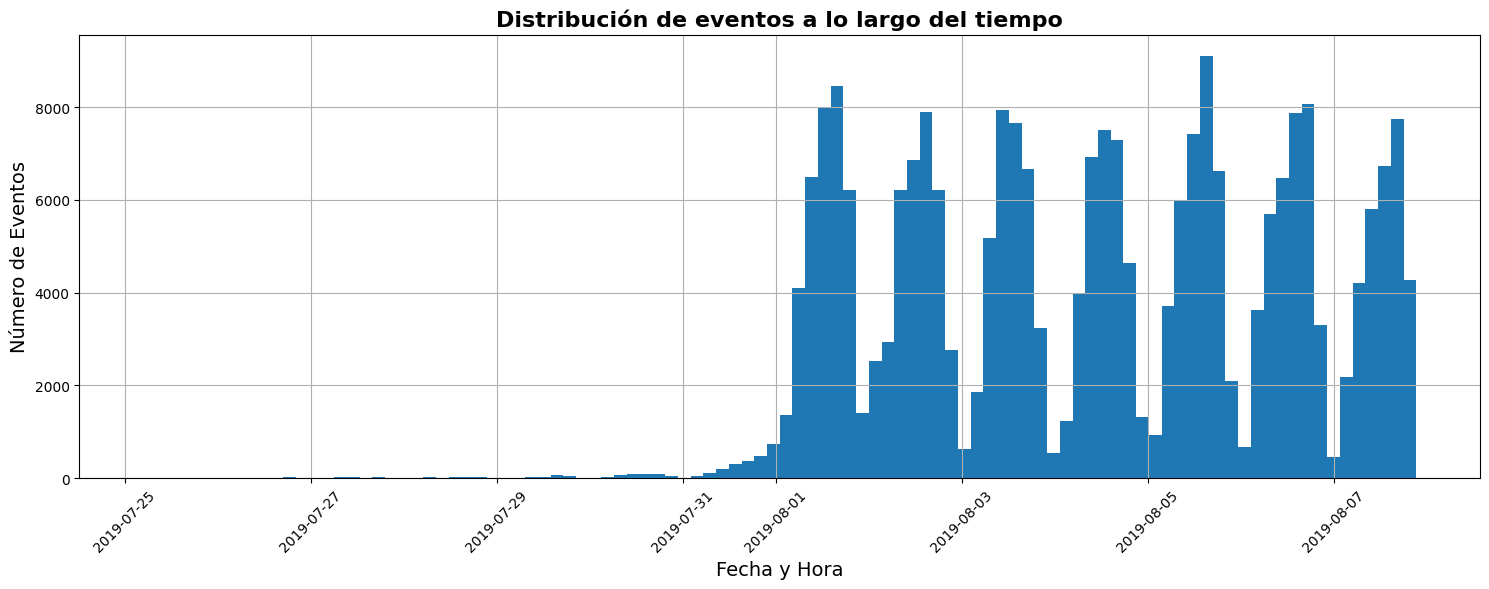

In [18]:
# Trazar un histograma por fecha y hora para visualizar la distribución de eventos
plt.figure(figsize=(15, 6))
df_logs['event_timestamp'].hist(bins=100)
plt.title('Distribución de eventos a lo largo del tiempo',fontsize=16, fontweight='bold')
plt.xlabel('Fecha y Hora', fontsize=14)
plt.ylabel('Número de Eventos', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observaciones:
#### Observando el histograma, se puede notar que hay una baja actividad de eventos al principio, con un aumento significativo a partir de una fecha específica. Esto sugiere que los datos no están completos para todo el rango de fechas que muestra min_date. Los eventos más antiguos podrían estar incompletos debido a razones técnicas, como se menciona en las instrucciones.

#### Para asegurarnos de que estamos trabajando con datos completos y representativos, debemos identificar el momento en que los datos se vuelven completos y excluir los datos anteriores a esa fecha.

#### Basándonos en la visualización, parece que los datos están completos aproximadamente a partir del 1 de agosto de 2019. Vamos a filtrar el DataFrame para incluir solo los eventos a partir de esa fecha y luego verificaremos cuántos eventos y usuarios perdimos al hacerlo.

### 3.3 Encontrar y definir un periodo de tiempo con datos completos.

Número de eventos perdidos al filtrar: 2828
Número de usuarios perdidos al filtrar: 17
Nuevo período de tiempo cubierto por los datos filtrados: desde 2019-08-01 00:07:28 hasta 2019-08-07 21:15:17


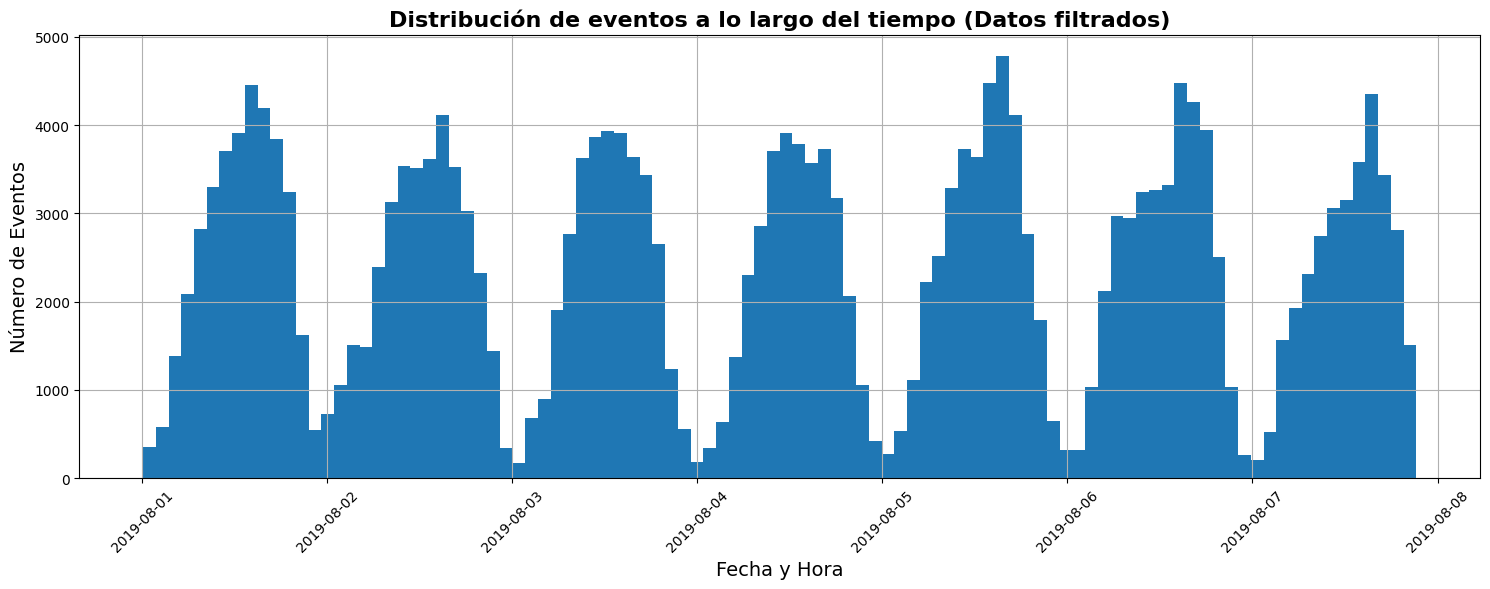

In [19]:
# Definir la fecha de inicio para datos completos
start_date = pd.to_datetime('2019-08-01')

# Filtrar el DataFrame para incluir solo eventos a partir de la fecha de inicio
df_logs_filtered = df_logs[df_logs['event_timestamp'] >= start_date].copy()

# Calcular cuántos eventos y usuarios se perdieron
events_lost = len(df_logs) - len(df_logs_filtered)
users_lost = df_logs['device_id_hash'].nunique() - df_logs_filtered['device_id_hash'].nunique()

print(f"Número de eventos perdidos al filtrar: {events_lost}")
print(f"Número de usuarios perdidos al filtrar: {users_lost}")

# Mostrar el nuevo período de tiempo cubierto por los datos filtrados
new_min_date = df_logs_filtered['event_timestamp'].min()
new_max_date = df_logs_filtered['event_timestamp'].max()
print(f"Nuevo período de tiempo cubierto por los datos filtrados: desde {new_min_date} hasta {new_max_date}")

# Verificar la distribución de eventos en los datos filtrados con un histograma
plt.figure(figsize=(15, 6))
df_logs_filtered['event_timestamp'].hist(bins=100)
plt.title('Distribución de eventos a lo largo del tiempo (Datos filtrados)',fontsize=16, fontweight='bold')
plt.xlabel('Fecha y Hora', fontsize=14)
plt.ylabel('Número de Eventos', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observaciónes:
#### Considerando que el número total inicial de eventos era de 244,126 y de usuarios era de 7,551, la pérdida de 2,828 eventos y 17 usuarios es relativamente pequeña; aproximadamente un 1.16% de eventos y 0.23% de usuarios. Por lo tanto, no perdimos una cantidad significativa de eventos y usuarios al excluir los datos más viejos.

### 3.4 Asegúrate de tener usuarios de los tres grupos experimentales.

In [7]:
# Verificamos los grupos experimentales presentes en los datos filtrados
experimental_groups = df_logs_filtered['exp_id'].unique()
print(f"Grupos experimentales presentes en los datos filtrados: {experimental_groups}")

# Contamos el número de usuarios únicos por grupo experimental en los datos filtrados
users_per_group = df_logs_filtered.groupby('exp_id')['device_id_hash'].nunique()
print("\nNúmero de usuarios únicos por grupo experimental (datos filtrados):")
print(users_per_group)

Grupos experimentales presentes en los datos filtrados: ['246' '247' '248']

Número de usuarios únicos por grupo experimental (datos filtrados):
exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64


### Observaciónes:
####Podemos ver que los datos filtrados contienen usuarios de los tres grupos experimentales con una cantidad bastante equilibrada en cada uno, lo que nos permite proceder con el análisis de los eventos y, luego el test A/A/B.

## Paso 4. Estudiar el embudo de eventos

### 4.1 Qué eventos hay en los registros y su frecuencia de suceso. Ordénarlos por frecuencia.

Frecuencia de eventos:
event_name
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: count, dtype: int64


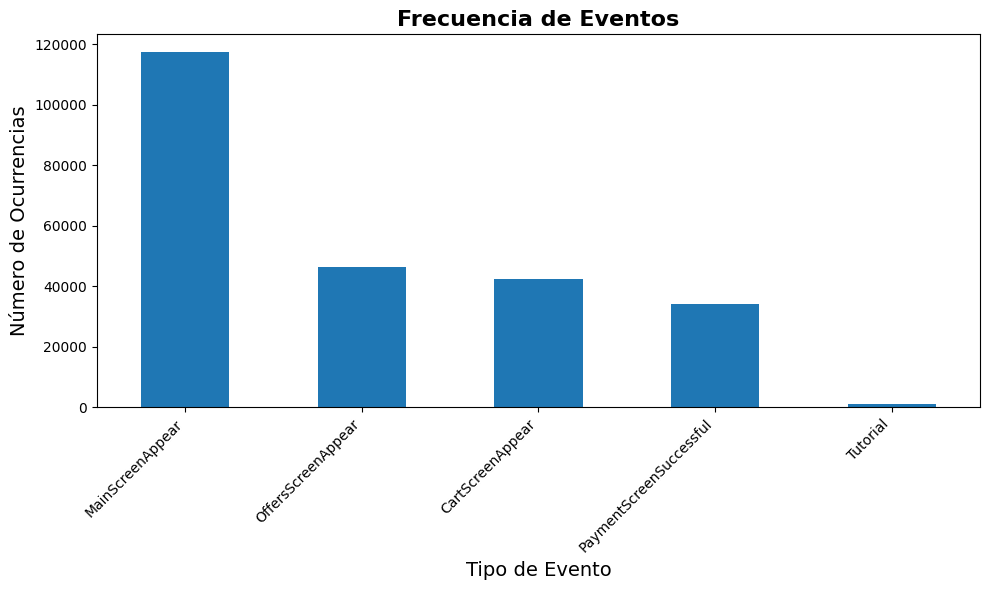

In [20]:
# Contamos la frecuencia de cada tipo de evento
event_counts = df_logs_filtered['event_name'].value_counts()

# Mostramos la frecuencia de los eventos ordenados por frecuencia
print("Frecuencia de eventos:")
print(event_counts)

# Visualizamos la frecuencia de eventos
plt.figure(figsize=(10, 6))
event_counts.plot(kind='bar')
plt.title('Frecuencia de Eventos', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Evento', fontsize=14)
plt.ylabel('Número de Ocurrencias', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Observaciónes:
#### Este gráfico nos da una idea inicial del flujo de usuarios a través de la aplicación; muchos usuarios empiezan en la pantalla principal, exploran ofertas, algunos añaden al carrito y un subconjunto de estos finaliza la compra. El tutorial parece que es una etapa menos común en el recorrido general del usuario, al menos en el período de datos completo que estamos analizando.

### 4.2 Análisis del embudo de eventos.

In [9]:
# Contar el número de usuarios únicos para cada evento
users_per_event = df_logs_filtered.groupby('event_name')['device_id_hash'].nunique().sort_values(ascending=False)

print("Número de usuarios únicos por evento:")
print(users_per_event)

Número de usuarios únicos por evento:
event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: device_id_hash, dtype: int64


### 4.3 Cantidad de usuarios que realizaron cada una de estas acciones, ordenar los eventos por el número de usuarios. Calcular la proporción de usuarios que realizaron la acción al menos una vez.

In [21]:
# Definimos el orden del embudo de conversión excluimos Tutorial
funnel_order = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]

# Filtramos el DataFrame para incluir solo los eventos del embudo
df_funnel = df_logs_filtered[df_logs_filtered['event_name'].isin(funnel_order)]

# Obtenemos el primer evento de cada usuario para determinar su punto de entrada al embudo
first_event_per_user = df_funnel.sort_values('event_timestamp').groupby('device_id_hash').first().reset_index()

# Contamos los usuarios en cada etapa del embudo en el orden
funnel_counts = first_event_per_user['event_name'].value_counts().reindex(funnel_order)

print("\nNúmero de usuarios que llegaron a cada etapa del embudo:")
print(funnel_counts)
print('-------------------------------------------------------------------')

# Calculamos las tasas de conversión
print("\nTasas de conversión del embudo:")
previous_step_count = 0
for i, event in enumerate(funnel_order):
    current_step_count = funnel_counts.loc[event]
    if i == 0:
        conversion_rate_from_previous = 1.0 # Considerando que vienen del anterior
        conversion_rate_from_start = 1.0    # COnsiderando que vienen desde el inicio
    else:
        # Tasa de conversión desde el paso previo
        conversion_rate_from_previous = current_step_count / previous_step_count if previous_step_count > 0 else 0
        # Tasa de conversión desde el inicio.
        conversion_rate_from_start = current_step_count / funnel_counts.iloc[0] if funnel_counts.iloc[0] > 0 else 0

    print(f"  {event}: {current_step_count} usuarios")
    if i > 0:
        print(f"    Tasa de conversión desde '{funnel_order[i-1]}': {conversion_rate_from_previous:.2%}")
        print(f"    Tasa de conversión desde el inicio ('{funnel_order[0]}'): {conversion_rate_from_start:.2%}")

    previous_step_count = current_step_count


Número de usuarios que llegaron a cada etapa del embudo:
event_name
MainScreenAppear           7085
OffersScreenAppear          287
CartScreenAppear             61
PaymentScreenSuccessful      97
Name: count, dtype: int64
-------------------------------------------------------------------

Tasas de conversión del embudo:
  MainScreenAppear: 7085 usuarios
  OffersScreenAppear: 287 usuarios
    Tasa de conversión desde 'MainScreenAppear': 4.05%
    Tasa de conversión desde el inicio ('MainScreenAppear'): 4.05%
  CartScreenAppear: 61 usuarios
    Tasa de conversión desde 'OffersScreenAppear': 21.25%
    Tasa de conversión desde el inicio ('MainScreenAppear'): 0.86%
  PaymentScreenSuccessful: 97 usuarios
    Tasa de conversión desde 'CartScreenAppear': 159.02%
    Tasa de conversión desde el inicio ('MainScreenAppear'): 1.37%


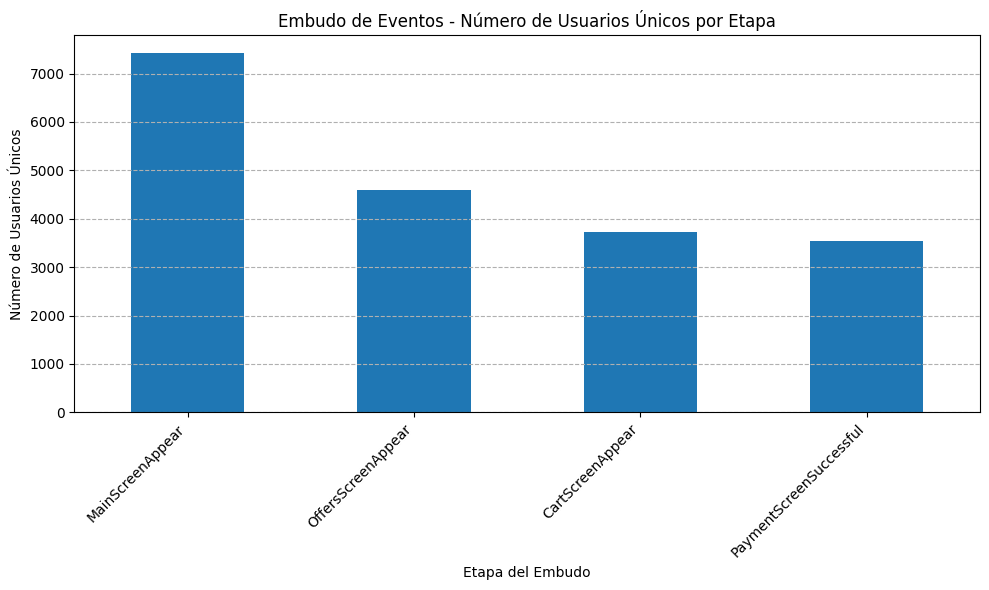


Caída de usuarios entre etapas:
  De 'MainScreenAppear' a 'OffersScreenAppear': 2826 usuarios perdidos (38.09%)
  De 'OffersScreenAppear' a 'CartScreenAppear': 859 usuarios perdidos (18.70%)
  De 'CartScreenAppear' a 'PaymentScreenSuccessful': 195 usuarios perdidos (5.22%)


In [23]:
# Definir el orden del embudo para la visualización
funnel_order_viz = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]

# Seleccionar el número de usuarios únicos para los eventos del embudo y ordenarlos
users_in_funnel = users_per_event.reindex(funnel_order_viz)

# Crear el gráfico de embudo (gráfico de barras)
plt.figure(figsize=(10, 6))
users_in_funnel.plot(kind='bar')
plt.title('Embudo de Eventos - Número de Usuarios Únicos por Etapa')
plt.xlabel('Etapa del Embudo')
plt.ylabel('Número de Usuarios Únicos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Imprimir las tasas de perdida de usuarios entre fases
print("\nCaída de usuarios entre etapas:")
previous_count = 0
for i, event in enumerate(funnel_order_viz):
    current_count = users_in_funnel.loc[event]
    if i > 0:
        drop_off = previous_count - current_count
        drop_off_rate = (drop_off / previous_count) * 100 if previous_count > 0 else 0
        print(f"  De '{funnel_order_viz[i-1]}' a '{event}': {drop_off} usuarios perdidos ({drop_off_rate:.2f}%)")
    previous_count = current_count

### Observaciónes:
#### Calculamos dos tipos de tasas de conversión; desde la etapa anterior y desde el inicio o MainScreenAppear.

#### Vemos que hay una caída significativa de usuarios entre la MainScreenAppear y la OffersScreenAppear; solo un 4.05% continúa. Este podría ser un cuello de botella importante en el embudo. Habría que investigar por qué tan pocos usuarios van desde la pantalla principal a la de ofertas.

#### Otro punto interesante es que la tasa de conversión de CartScreenAppear a PaymentScreenSuccessful parece muy alta 159%, esto es un indicador de que la metodología de contar el "primer evento en el orden" como punto de entrada al embudo puede no ser la mejor forma de representar el flujo real. Podría ser más útil considerar a todos los usuarios que alcanzan cada etapa, independientemente de si fue su primer evento en la secuencia definida.

####

### Observaciones en general:
#### El análisis del embudo de eventos revela que la pantalla principal MainScreenAppear es el punto de entrada más común para los usuarios. Sin embargo, se observa una caída significativa de usuarios al pasar de la pantalla principal a la de ofertas OffersScreenAppear, lo que sugiere un cuello de botella importante en esta transición.
#### Aunque hay pérdidas menores en las etapas posteriores de ofertas al carrito y del carrito al pago exitoso, la mayor oportunidad de mejora para aumentar la conversión estaría en optimizar el paso inicial de la pantalla principal a la de ofertas para catpar a más usuarios y llevarlos hacia las etapas de compra. Una vez que los usuarios llegan a la pantalla del carrito, la mayoría parece completar la compra.



## Paso 5. Estudiar los resultados del experimento

### 5.1 Observar diferencias en grupos, prueba A/A

In [12]:
from statsmodels.stats.proportion import proportions_ztest

# Definimos los grupos de control para el test A/A
group_a1 = '246'
group_a2 = '247'

# Filtramos los datos para incluir solo los grupos A1 y A2
df_aa = df_logs_filtered[df_logs_filtered['exp_id'].isin([group_a1, group_a2])].copy()

# Definimos las etapas del embudo a analizar
funnel_stages = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]

# Obtener la lista de usuarios únicos en cada grupo A1 y A2
users_a1 = df_aa[df_aa['exp_id'] == group_a1]['device_id_hash'].unique()
users_a2 = df_aa[df_aa['exp_id'] == group_a2]['device_id_hash'].unique()

n_users_a1 = len(users_a1)
n_users_a2 = len(users_a2)

print(f"Número de usuarios en Grupo {group_a1}: {n_users_a1}")
print(f"Número de usuarios en Grupo {group_a2}: {n_users_a2}")
print("-" * 30)

# Iteramos sobre cada etapa del embudo y realizar la prueba Z
alpha = 0.05  # Nivel de significancia

print("Resultados del Test A/A (Grupos 246 vs 247):")

for stage in funnel_stages:
    # Contamos usuarios únicos que llegaron a esta etapa en cada grupo
    users_reached_stage_a1 = df_aa[(df_aa['exp_id'] == group_a1) & (df_aa['event_name'] == stage)]['device_id_hash'].nunique()
    users_reached_stage_a2 = df_aa[(df_aa['exp_id'] == group_a2) & (df_aa['event_name'] == stage)]['device_id_hash'].nunique()

    # Realizamos la prueba Z para comparar las proporciones
    # counts: número de usuarios que llegaron a la etapa
    # nobs: número total de usuarios en el grupo
    count = [users_reached_stage_a1, users_reached_stage_a2]
    nobs = [n_users_a1, n_users_a2]

    z_stat, p_value = proportions_ztest(count, nobs)

    print(f"\nEtapa: {stage}")
    print(f"  Usuarios que llegaron a {stage} en Grupo {group_a1}: {users_reached_stage_a1} ({users_reached_stage_a1/n_users_a1:.2%})")
    print(f"  Usuarios que llegaron a {stage} en Grupo {group_a2}: {users_reached_stage_a2} ({users_reached_stage_a2/n_users_a2:.2%})")
    print(f"  Estadístico Z: {z_stat:.4f}")
    print(f"  Valor P: {p_value:.4f}")

    # Interpretar el resultado de la prueba
    if p_value < alpha:
        print("  Resultado: Diferencia estadísticamente significativa (Rechazamos H0)")
    else:
        print("  Resultado: No hay diferencia estadísticamente significativa (No podemos rechazar H0)")

Número de usuarios en Grupo 246: 2484
Número de usuarios en Grupo 247: 2513
------------------------------
Resultados del Test A/A (Grupos 246 vs 247):

Etapa: MainScreenAppear
  Usuarios que llegaron a MainScreenAppear en Grupo 246: 2450 (98.63%)
  Usuarios que llegaron a MainScreenAppear en Grupo 247: 2476 (98.53%)
  Estadístico Z: 0.3093
  Valor P: 0.7571
  Resultado: No hay diferencia estadísticamente significativa (No podemos rechazar H0)

Etapa: OffersScreenAppear
  Usuarios que llegaron a OffersScreenAppear en Grupo 246: 1542 (62.08%)
  Usuarios que llegaron a OffersScreenAppear en Grupo 247: 1520 (60.49%)
  Estadístico Z: 1.1550
  Valor P: 0.2481
  Resultado: No hay diferencia estadísticamente significativa (No podemos rechazar H0)

Etapa: CartScreenAppear
  Usuarios que llegaron a CartScreenAppear en Grupo 246: 1266 (50.97%)
  Usuarios que llegaron a CartScreenAppear en Grupo 247: 1238 (49.26%)
  Estadístico Z: 1.2034
  Valor P: 0.2288
  Resultado: No hay diferencia estadístic

### Observaciónes:
#### Para todas las etapas del embudo analizadas, el valor P obtenido de la prueba Z es mayor que nuestro nivel de significancia. Esto significa que no hay una diferencia estadísticamente significativa en la proporción de usuarios que alcanzan cada una de estas etapas entre el Grupo 246 y el Grupo 247.

### Los dos grupos de control se comportan de manera muy similar. Esto es un resultado positivo para este test A/A.

#### Como los grupos de control son comparables, podemos proceder con el análisis del test A/B con confianza.

### 5.2 Seleccionar el evento más popular y calcular su proporción. Ver si la diferencia es estadisticamente significativa.

In [13]:
# Definir una función para realizar la prueba Z para proporciones
def check_statistical_difference(group1_id, group2_id, event_name, df, alpha=0.05):

    # Filtramos datos para los dos grupos
    df_groups = df[df['exp_id'].isin([group1_id, group2_id])].copy()

    # Obtenemos el número total de usuarios únicos en cada grupo
    n_users_group1 = df_groups[df_groups['exp_id'] == group1_id]['device_id_hash'].nunique()
    n_users_group2 = df_groups[df_groups['exp_id'] == group2_id]['device_id_hash'].nunique()

    # Contamos usuarios únicos que realizaron el evento en cada grupo
    users_with_event_group1 = df_groups[(df_groups['exp_id'] == group1_id) & (df_groups['event_name'] == event_name)]['device_id_hash'].nunique()
    users_with_event_group2 = df_groups[(df_groups['exp_id'] == group2_id) & (df_groups['event_name'] == event_name)]['device_id_hash'].nunique()

    # Preparamos datos para la prueba Z
    count = [users_with_event_group1, users_with_event_group2]
    nobs = [n_users_group1, n_users_group2]

    # Ahora Realizamos la prueba Z
    z_stat, p_value = proportions_ztest(count, nobs)

    # Imprimimos los resultados
    print(f"Comparando el evento '{event_name}' entre Grupo {group1_id} y Grupo {group2_id}:")
    print(f"  Usuarios en Grupo {group1_id} que realizaron '{event_name}': {users_with_event_group1} ({users_with_event_group1/n_users_group1:.2%})")
    print(f"  Usuarios en Grupo {group2_id} que realizaron '{event_name}': {users_with_event_group2} ({users_with_event_group2/n_users_group2:.2%})")
    print(f"  Estadístico Z: {z_stat:.4f}")
    print(f"  Valor P: {p_value:.4f}")

    # Interpretamos el resultado
    if p_value < alpha:
        print("  Resultado: Diferencia estadísticamente significativa (Rechazamos H0)")
    else:
        print("  Resultado: No hay diferencia estadísticamente significativa (No podemos rechazar H0)")
    print("-" * 50)


# Definimos nuevamente los grupos de control y el nivel alpha
group_a1 = '246'
group_a2 = '247'
alpha = 0.05

# Obtenemos la lista de todos los eventos únicos en los datos filtrados
all_events = df_logs_filtered['event_name'].unique()

# Iteramos sobre cada evento y realizamos la prueba A/A
print("Resultados de la prueba A/A para cada evento individualmente (Grupos 246 vs 247):")
for event in all_events:
    check_statistical_difference(group_a1, group_a2, event, df_logs_filtered, alpha)

Resultados de la prueba A/A para cada evento individualmente (Grupos 246 vs 247):
Comparando el evento 'Tutorial' entre Grupo 246 y Grupo 247:
  Usuarios en Grupo 246 que realizaron 'Tutorial': 278 (11.19%)
  Usuarios en Grupo 247 que realizaron 'Tutorial': 283 (11.26%)
  Estadístico Z: -0.0782
  Valor P: 0.9377
  Resultado: No hay diferencia estadísticamente significativa (No podemos rechazar H0)
--------------------------------------------------
Comparando el evento 'MainScreenAppear' entre Grupo 246 y Grupo 247:
  Usuarios en Grupo 246 que realizaron 'MainScreenAppear': 2450 (98.63%)
  Usuarios en Grupo 247 que realizaron 'MainScreenAppear': 2476 (98.53%)
  Estadístico Z: 0.3093
  Valor P: 0.7571
  Resultado: No hay diferencia estadísticamente significativa (No podemos rechazar H0)
--------------------------------------------------
Comparando el evento 'OffersScreenAppear' entre Grupo 246 y Grupo 247:
  Usuarios en Grupo 246 que realizaron 'OffersScreenAppear': 1542 (62.08%)
  Usuar

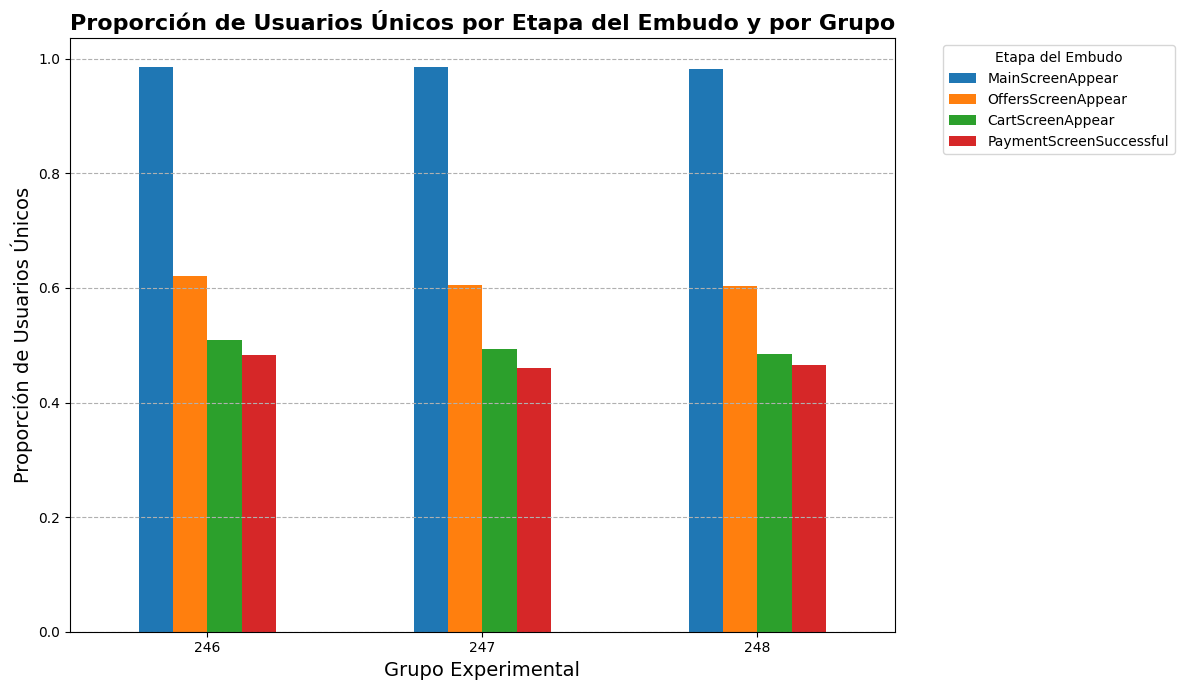

In [24]:
# Definir los grupos y las etapas del embudo para poder graficar
# No es solicitado pero es util la visualizacion y en afan de practicar...
groups = ['246', '247', '248']
funnel_stages = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]

# Calcular la proporción de usuarios únicos que llegaron a cada etapa por grupo
proportions_by_group_stage = {}
for group_id in groups:
    # Número total de usuarios en el grupo
    n_users_group = df_logs_filtered[df_logs_filtered['exp_id'] == group_id]['device_id_hash'].nunique()

    proportions_by_group_stage[group_id] = {}
    for stage in funnel_stages:
        # Número de usuarios únicos que llegaron a esta etapa en el grupo
        users_reached_stage = df_logs_filtered[(df_logs_filtered['exp_id'] == group_id) & (df_logs_filtered['event_name'] == stage)]['device_id_hash'].nunique()
        # Calcular la proporción
        proportion = users_reached_stage / n_users_group if n_users_group > 0 else 0
        proportions_by_group_stage[group_id][stage] = proportion

# Convertir el diccionario a un DataFrame para facilitar la visualización
df_proportions = pd.DataFrame(proportions_by_group_stage)

# Transponer el DataFrame para que las etapas sean filas y los grupos columnas
df_proportions = df_proportions.T

# Ordenar las columnas (etapas) según el orden del embudo
df_proportions = df_proportions[funnel_stages]

# Crear el gráfico de barras agrupadas
df_proportions.plot(kind='bar', figsize=(12, 7))
plt.title('Proporción de Usuarios Únicos por Etapa del Embudo y por Grupo', fontsize=16, fontweight='bold')
plt.xlabel('Grupo Experimental', fontsize=14)
plt.ylabel('Proporción de Usuarios Únicos', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Etapa del Embudo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# User Behavior Analysis and Typography A/A/B Test

## Project Overview

This project investigates user behavior within a food delivery application with two primary goals:
1. To map and analyze the user conversion funnel to identify bottlenecks.
2. To evaluate the impact of a typography change through an A/A/B test.

The analysis aims to provide data-driven insights to optimize the conversion rate and guide design decisions.

## Problem

The company needs to understand how users navigate the application towards making a purchase. Specifically:
- How many users reach the purchase stage?
- Where do users drop off in the funnel?
- What is the impact of a proposed application-wide font change on user behavior and conversion rates? Management is concerned the new font might be perceived as "intimidating."

An A/A/B test was conducted with three groups: two control groups using the old font and one test group using the new font. The A/A test between the two control groups serves to validate the experimental setup and establish a baseline for expected variation.

## Development

The analysis involved several steps:

1.  **Data Loading and Preparation**:
    - Loaded log data from `logs_exp_us.csv`.
    - Parsed a single combined column into separate columns (`event_name`, `device_id_hash`, `event_timestamp`, `exp_id`).
    - Converted `event_timestamp` to datetime objects and extracted a separate date column.
    - Checked for missing values and found none.

2.  **Data Study and Verification**:
    - Calculated the total number of events and unique users.
    - Determined the average number of events per user.
    - Identified the time period covered by the data.
    - Analyzed the distribution of events over time using a histogram, revealing incomplete data at the beginning of the log period.
    - Filtered the data to include only the period with complete data (starting from August 1, 2019).
    - Verified that filtering did not result in a significant loss of events or users.
    - Confirmed the presence of users from all three experimental groups in the filtered data with a relatively balanced distribution.

3.  **Event Funnel Analysis**:
    - Studied the frequency of each event type, identifying `MainScreenAppear` as the most frequent.
    - Analyzed the conversion funnel based on unique users reaching key stages (`MainScreenAppear` -> `OffersScreenAppear` -> `CartScreenAppear` -> `PaymentScreenSuccessful`).
    - Visualized the funnel to show user drop-off points.

4.  **A/A/B Test Analysis**:
    - Conducted an A/A test between the two control groups (246 and 247) using the Z-test for proportions to compare the percentage of users reaching each funnel stage.
    - Conducted A/B tests comparing the test group (248) with each control group individually (248 vs 246, 248 vs 247) and with the combined control groups (248 vs 246+247) for each event type using the Z-test for proportions.
    - Used a significance level ($\alpha$) of 0.05 for the statistical tests. Acknowledged the implication of multiple comparisons and the use of Bonferroni correction ($\alpha_{adjusted} = 0.0025$).
    - Visualized the proportion of users reaching each funnel stage by group to support the statistical findings.

## Solution

Based on the analysis:

1.  **Conversion Funnel**: The primary bottleneck in the user journey is the transition from the **Main Screen to the Offers Screen**. A significant number of users drop off at this stage. The subsequent stages (Offers to Cart, Cart to Payment Successful) show relatively higher completion rates for users who reach them.
2.  **A/A Test**: The A/A test confirmed **no statistically significant difference** between the two control groups (246 and 247) across all major funnel events. This validates the experimental setup and user distribution.
3.  **A/B Test**: The A/B test comparing the test group (248) with the control groups (246, 247, and combined) revealed **no statistically significant difference** in the proportion of users reaching any of the key funnel stages or the Tutorial event.

## Recommendations

1.  **Focus on Main Screen to Offers Transition**: The most impactful opportunity for improving overall conversion lies in optimizing the Main Screen experience and the user's journey towards exploring offers. Investigate potential reasons for the low transition rate, such as the visibility and clarity of calls-to-action, user interface design, or initial user engagement elements on the main screen.
2.  **Typography Change Decision**: Since the A/B test showed **no statistically significant impact** (neither positive nor negative) on key conversion metrics, the decision to implement the new typography can be based on **other factors** beyond conversion rate. These factors may include improved readability, aesthetic appeal, brand consistency, or technical ease of implementation. There is no statistical evidence from this experiment to suggest that the new font "intimidates" users or negatively affects conversion.

This README provides a structured overview of the project, highlighting the problem addressed, the analytical steps taken, the key findings (solution), and actionable recommendations for the company.

### Observaciones:
#### Para todos los eventos analizados, el valor P obtenido de la prueba Z es mayor que nuestro nivel de significancia alpha = 0.05 Esto significa que no hay diferencia estadísticamente significativa en la proporción de usuarios que realizaron cada evento entre el Grupo 246 y el Grupo 247.

#### Con base en los resultados de estas pruebas A/A individuales para cada evento, podemos confirmar que los grupos de control 246 y 247 se dividieron correctamente y son estadísticamente similares en cuanto al comportamiento de los usuarios en cada tipo de evento. Esto refuerza la confianza en la calidad de los datos y en la configuración del experimento, permitiéndonos proceder con seguridad al análisis A/B para comparar el grupo de prueba con estos grupos de control.

### 5.3 Comparación de los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Luego comparación resultados con los resultados combinados de los grupos de control.

In [15]:
# Definimos los grupos
group_a1 = '246'
group_a2 = '247'
group_b = '248'
alpha = 0.05

# Obtenemos la lista de todos los eventos únicos en los datos filtrados
all_events = df_logs_filtered['event_name'].unique()

print("--- Resultados del Test A/B ---")

# Comparamos Grupo B (248) vs Grupo A1 (246) para cada evento
print("\nComparando Grupo B (248) vs Grupo A1 (246):")
for event in all_events:
    check_statistical_difference(group_b, group_a1, event, df_logs_filtered, alpha)

# Comparamos ahora Grupo B (248) vs Grupo A2 (247) para cada evento
print("\nComparando Grupo B (248) vs Grupo A2 (247):")
for event in all_events:
    check_statistical_difference(group_b, group_a2, event, df_logs_filtered, alpha)

# Comparamos Grupo B (248) vs Grupos A combinados (246 + 247) para cada evento

# Creamos un DataFrame con los grupos A combinados
df_a_combined = df_logs_filtered[df_logs_filtered['exp_id'].isin([group_a1, group_a2])].copy()

# Obtenemos el número total de usuarios únicos en los grupos A combinados y el grupo B
n_users_a_combined = df_a_combined['device_id_hash'].nunique()
n_users_b = df_logs_filtered[df_logs_filtered['exp_id'] == group_b]['device_id_hash'].nunique()

print("\nComparando Grupo B (248) vs Grupos A combinados (246 + 247):")
for event in all_events:
    # Contamos usuarios únicos que realizaron el evento en los grupos A combinados y el grupo B
    users_with_event_a_combined = df_a_combined[df_a_combined['event_name'] == event]['device_id_hash'].nunique()
    users_with_event_b = df_logs_filtered[df_logs_filtered['exp_id'] == event]['device_id_hash'].nunique()


    # Preparamos datos para la prueba Z
    count = [users_with_event_b, users_with_event_a_combined]
    nobs = [n_users_b, n_users_a_combined]

    # Realizamos la prueba Z
    z_stat, p_value = proportions_ztest(count, nobs)

    # Imprimimos resultados
    print(f"Comparando el evento '{event}' entre Grupo {group_b} y Grupos A combinados:")
    print(f"  Usuarios en Grupo {group_b} que realizaron '{event}': {users_with_event_b} ({users_with_event_b/n_users_b:.2%})")
    print(f"  Usuarios en Grupos A combinados que realizaron '{event}': {users_with_event_a_combined} ({users_with_event_a_combined/n_users_a_combined:.2%})")
    print(f"  Estadístico Z: {z_stat:.4f}")
    print(f"  Valor P: {p_value:.4f}")

    # Interpretamos el resultado
    if p_value < alpha:
        print("  Resultado: Diferencia estadísticamente significativa (Rechazamos H0)")
    else:
        print("  Resultado: No hay diferencia estadísticamente significativa (No podemos rechazar H0)")
    print("-" * 50)

--- Resultados del Test A/B ---

Comparando Grupo B (248) vs Grupo A1 (246):
Comparando el evento 'Tutorial' entre Grupo 248 y Grupo 246:
  Usuarios en Grupo 248 que realizaron 'Tutorial': 279 (11.00%)
  Usuarios en Grupo 246 que realizaron 'Tutorial': 278 (11.19%)
  Estadístico Z: -0.2193
  Valor P: 0.8264
  Resultado: No hay diferencia estadísticamente significativa (No podemos rechazar H0)
--------------------------------------------------
Comparando el evento 'MainScreenAppear' entre Grupo 248 y Grupo 246:
  Usuarios en Grupo 248 que realizaron 'MainScreenAppear': 2493 (98.27%)
  Usuarios en Grupo 246 que realizaron 'MainScreenAppear': 2450 (98.63%)
  Estadístico Z: -1.0473
  Valor P: 0.2950
  Resultado: No hay diferencia estadísticamente significativa (No podemos rechazar H0)
--------------------------------------------------
Comparando el evento 'OffersScreenAppear' entre Grupo 248 y Grupo 246:
  Usuarios en Grupo 248 que realizaron 'OffersScreenAppear': 1531 (60.35%)
  Usuarios 

### Onbservaciones:
#### Después de comparar el grupo de prueba con las fuentes alteradas con los grupos de control individualmente y combinados, encontramos que no hay una diferencia estadísticamente significativa en la proporción de usuarios que realizan ninguno de los eventos clave del embudo.

#### Esto significa que, con base en los datos de este experimento, el cambio de fuente no tuvo un impacto detectable ni positivo ni negativo en el comportamiento del usuario en las etapas principales del embudo de conversión. La empresa puede estar tranquila de que la nueva tipografía no parece "intimidar" a los usuarios ni afectar negativamente las tasas de conversión, pero tampoco parece ofrecer una mejora significativa en estas métricas.

#### Por lo tanto, la decisión de implementar o no el cambio de fuente debería basarse en otros factores, como preferencias de diseño, consistencia de marca o facilidad de lectura percibida, ya que no hay evidencia estadística de un impacto en las métricas de conversión clave.

### Conclusiones estadísticas:
#### **Nivel de significancia establecido:** Para todas las pruebas de hipótesis estadísticas que realizamos anteriormente establecimos un nivel de significancia alpha de 0.05.

#### **Cantidad de pruebas realizadas:** Hemos realizado pruebas Z para proporciones en varios escenarios: En total, hemos realizado 20 pruebas de hipótesis

#### **Nivel de significancia más estricto:** Usar un alpha de 0.01 en lugar de 0.05 haría más difícil encontrar diferencias significativas. En nuestro caso, la mayoría de nuestros P-valores para las métricas clave ya eran mayores que 0.05, por lo que cambiar a 0.01 no alteraría nuestra conclusión fundamental de que el cambio de fuente no tuvo un impacto detectable estadísticamente significativo en las tasas de conversión del embudo principal. Reforzaría la conclusión de que los grupos de control son similares.

#### **¿Cual deberia ser el nivel de significancia?** El nivel de significancia estándar es 0.05, y es el que hemos utilizado hasta ahora. Es comúnmente aceptado porque equilibra el riesgo de falsos positivos y falsos negativos.

#### En este caso que realizamos varias pruebas, se podría considerar un ajuste para comparaciones múltiples, como la Corrección de Bonferroni, que daría un alpha de 0.0025.

#### En este caso nuestras principales métricas del embudo no mostraron significancia estadística con el alpha de 0.05. Por lo tanto, es razonable mantener el alpha en 0.05  y no cambia nuestra conclusión principal del impacto del cambio de fuente en la conversión.

#### Entonces si el objetivo fuera ser muy estrictos para evitar cualquier posible falso positivo, entonces usar un alpha ajustado sería el enfoque más estricto.

#### Para este análisis, podemos quedarnos con 0.05 y estar seguros de nuestras conclusiones.

## **Conclusiones y Recomendaciones para la Optimización de la Conversión en E-commerce**

#### Basado en el análisis de los datos de comportamiento del usuario y los resultados del Test A/A/B, presentamos las siguientes conclusiones y recomendaciones clave:

### Análisis del Embudo de Conversión:

####El análisis del embudo de eventos reveló que la pantalla principal es el punto de entrada dominante para los usuarios. Sin embargo, se identificó un cuello de botella significativo en la transición de la pantalla principal a la pantalla de ofertas, con una caída considerable de usuarios en esta etapa. Las etapas posteriores del embudo muestran una tasa de finalización relativamente alta una vez que los usuarios llegan al carrito.

#### **Recomendación:** La principal oportunidad para mejorar la tasa de conversión general reside en optimizar la experiencia del usuario en la pantalla principal y la forma en que los usuarios son guiados o incentivados a explorar las ofertas. Se sugiere investigar las posibles razones de la baja transición en esta etapa, la visibilidad de las ofertas, o problemas de usabilidad inicial.

### Análisis del Test A/A/B:

#### El Test A/A/B, mostró que no hay una diferencia estadísticamente significativa en la proporción de usuarios que alcanzan las etapas clave del embudo de conversión entre el grupo de prueba y los grupos de control. El Test A/A previo confirmó que los grupos de control 246 y 247 se comportaron de manera estadísticamente similar, validando la configuración experimental.

#### Conclusión sobre el Test A/A/B: La nueva tipografía no parece tener un impacto detectable ni positivo ni negativo en las métricas de conversión clave. La preocupación de la gerencia sobre si la nueva fuente podría "intimidar" a los usuarios y afectar negativamente la conversión no se ve respaldada por la evidencia estadística de este experimento.

#### **Recomendación sobre el Cambio de Fuentes:** Dado que el cambio de fuente no mostró un impacto estadísticamente significativo en las métricas de conversión clave, la decisión de implementar la nueva tipografía puede basarse en otros factores. No hay una razón estadística para evitar la implementación basada únicamente en el riesgo de afectar negativamente la conversión.

### **Resumen General:**

#### El análisis prioriza la optimización del flujo de usuarios desde la pantalla principal a las ofertas como el área de mayor impacto potencial en la conversión. El cambio de fuente, si bien no mostró impacto en las métricas de conversión, puede proceder basado en criterios de diseño y usabilidad, sin temor a perjudicar la conversión según los resultados de este experimento.

